# 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# 2. Read the data as a data frame

In [4]:
df = pd.read_csv("bank-full.csv")

# 3. Exploratory Data Analysis

# a. Shape of the data

In [245]:
df.shape

(45211, 17)

# b. Data type of each attribute

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# c. Checking the presence of missing values

In [247]:
df.isnull().values.any()

False

Looks like there are no missing values

# d. 5 point summary of numerical attributes

In [248]:
df.describe()[3:]

,age,balance,day,duration,campaign,pdays,previous
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0


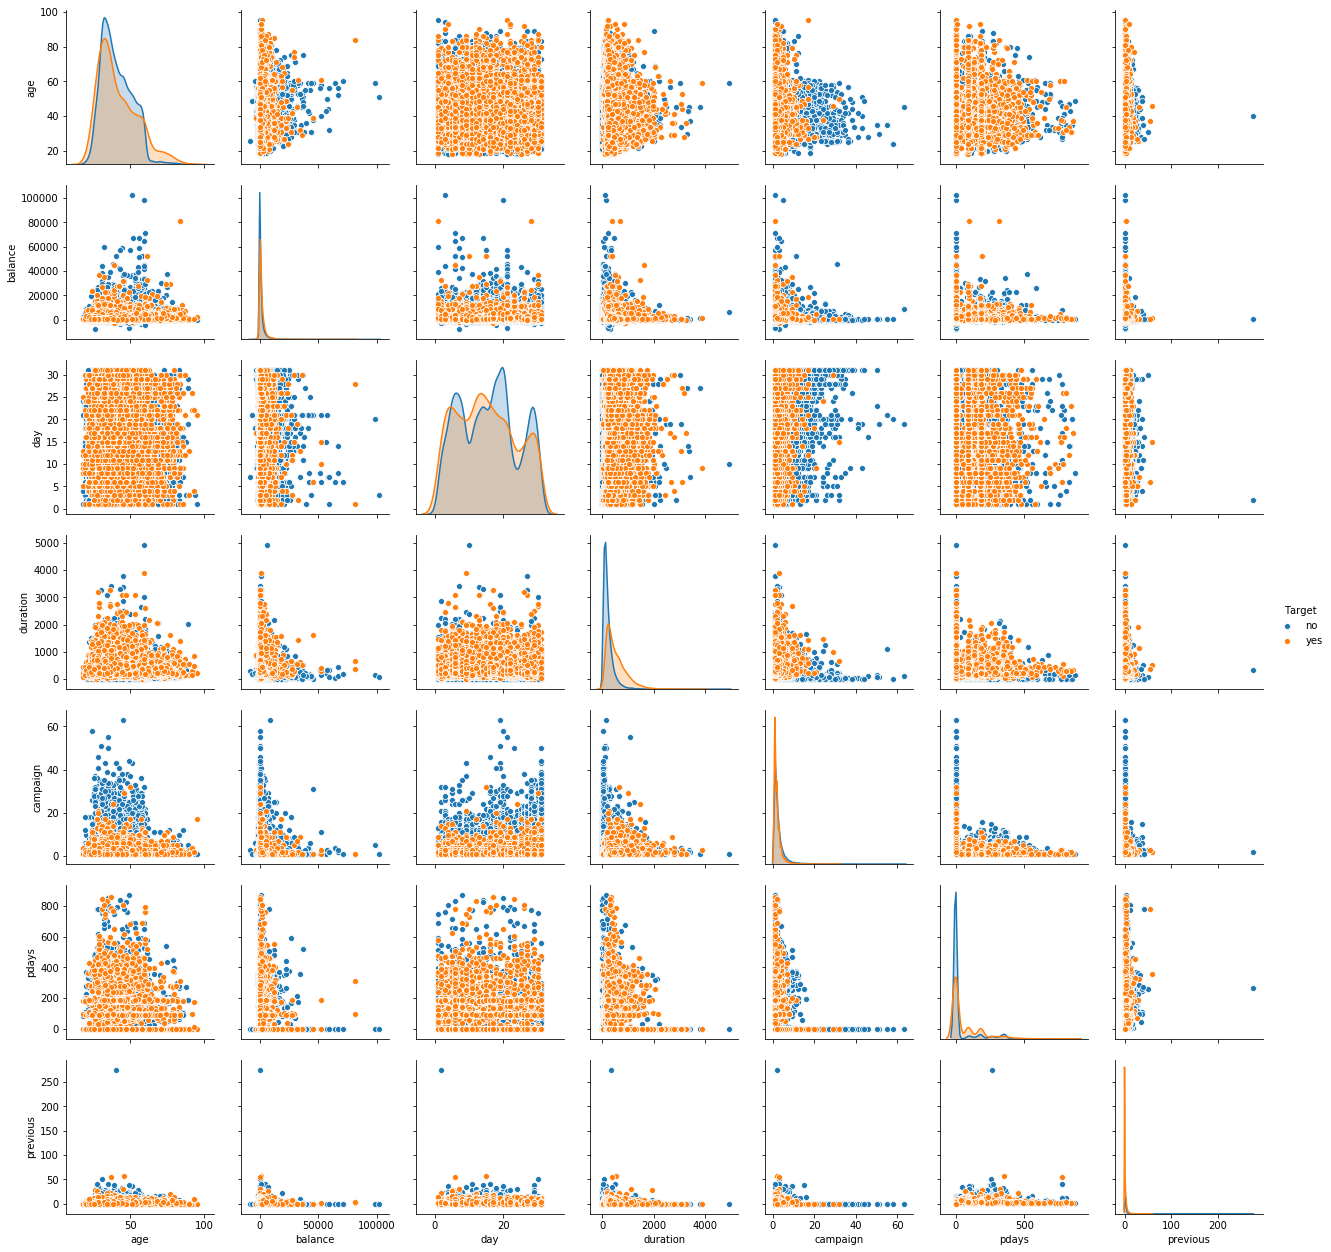

In [249]:
sns.pairplot(df,hue='Target')

# e. Checking the presence of outliers

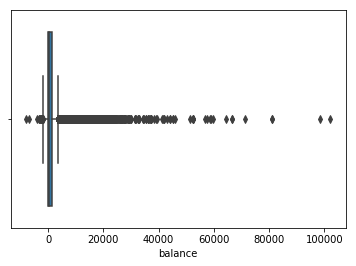

In [250]:
sns.boxplot(x=df['balance'])

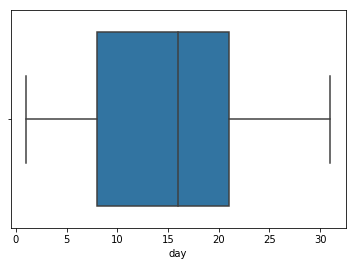

In [251]:
sns.boxplot(x=df['day'])

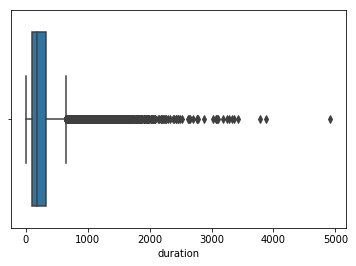

In [252]:
sns.boxplot(x=df['duration'])

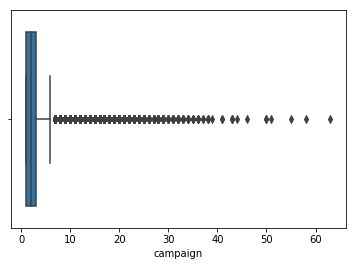

In [253]:
sns.boxplot(x=df['campaign'])

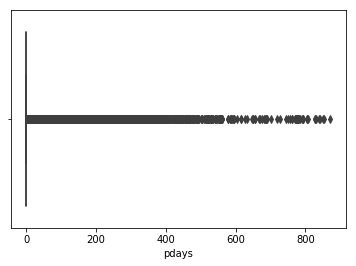

In [254]:
sns.boxplot(x=df['pdays'])

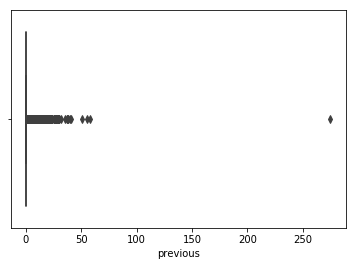

In [255]:
sns.boxplot(x=df['previous'])

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [7]:
print("Before removing outliers",df.shape)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After removing outliers",df.shape)

Before removing outliers (45211, 17)
After removing outliers (28193, 17)


Scaling the Data

In [8]:
scaler = StandardScaler()
df[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(df[['age','balance','day','duration','campaign','pdays','previous']])
df[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(df[['age','balance','day','duration','campaign','pdays','previous']])

# 4. Prepare the data to train a model 

In [9]:
#Checking for any special characters like ? in categorcial columns 
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())
print(df['Target'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown']
['no' 'yes']


Converting data to categorical columns and creating dummies:

In [10]:
df['housing']=df['housing'].astype('category')
df=pd.concat([df,pd.get_dummies(df['housing'], prefix='housing')],axis=1)
del df['housing']
df['loan']=df['loan'].astype('category')
df=pd.concat([df,pd.get_dummies(df['loan'], prefix='loan')],axis=1)
del df['loan']
df['contact']=df['contact'].astype('category')
df=pd.concat([df,pd.get_dummies(df['contact'], prefix='contact')],axis=1)
del df['contact']
df['month']=df['month'].astype('category')
df=pd.concat([df,pd.get_dummies(df['month'], prefix='month')],axis=1)
del df['month']
df['poutcome']=df['poutcome'].astype('category')
df=pd.concat([df,pd.get_dummies(df['poutcome'], prefix='poutcome')],axis=1)
del df['poutcome']
df['job']=df['job'].astype('category')
df=pd.concat([df,pd.get_dummies(df['job'], prefix='job')],axis=1)
del df['job']
df['marital']=df['marital'].astype('category')
df=pd.concat([df,pd.get_dummies(df['marital'], prefix='marital')],axis=1)
del df['marital']
df['education']=df['education'].astype('category')
df=pd.concat([df,pd.get_dummies(df['education'], prefix='education')],axis=1)
del df['education']
df['default']=df['default'].astype('category')
df=pd.concat([df,pd.get_dummies(df['default'], prefix='default')],axis=1)
del df['default']

Understanding the distribution of Target column:

26594 , 1599


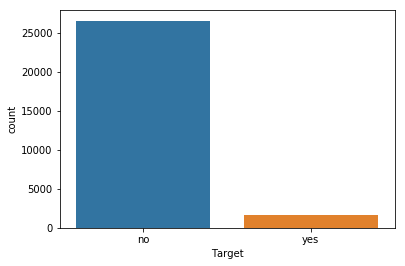

In [11]:
sns.countplot(df['Target'])
print(len(df[df['Target']=='no'].index),",",len(df[df['Target']=='yes'].index))

Looks like the target column in highly biased

Splitting the data into training and testing in 70-30 ratio:

In [12]:
df.Target.replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
X=df.loc[:, df.columns != 'Target']
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Since there is imbalance in the target column, I am applying oversampling technique

In [13]:
sm = SMOTE(random_state = 1) 
X_train, y_train = sm.fit_sample(X_train, y_train) 

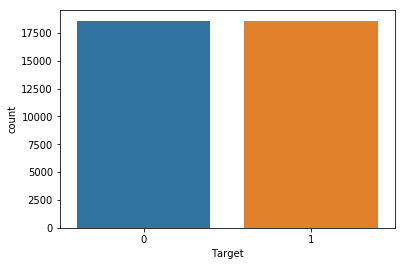

In [14]:
sns.countplot(y_train)

# 5. Train a few standard classification algorithms

Logistic Regression:

In [265]:
clf = LogisticRegression(random_state=2).fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))  
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))    

Train Accuracy: 0.893517523113309
Test Accuracy: 0.8982028848427525
[[7406  584]
 [ 277  191]]
F1 Score:  0.6261928793202631
Precision:  0.6051989940085568
Recall:  0.6675141469572008


/Users/sdevarakonda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Naive Bayes Classifier:

In [266]:
clf = GaussianNB().fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))    

Train Accuracy: 0.7638411094388303
Test Accuracy: 0.7278316386852683
[[5849 2141]
 [ 161  307]]
F1 Score:  0.5230669214187732
Precision:  0.5493099056039499
Recall:  0.6940114780227421


KNN : 

In [239]:
result_dict={}
for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    result_dict[i]={'train_accuracy':accuracy_score(y_train, y_train_pred),'test_accuracy':
                     accuracy_score(y_test, y_pred)}
print(result_dict)

{1: {'train_accuracy': 1.0, 'test_accuracy': 0.9043509103807047}, 2: {'train_accuracy': 0.9865351537303806, 'test_accuracy': 0.9177110427997163}, 3: {'train_accuracy': 0.9672919802193076, 'test_accuracy': 0.8811775833530385}, 4: {'train_accuracy': 0.9647118899161471, 'test_accuracy': 0.8900449278789312}, 5: {'train_accuracy': 0.9470812728445496, 'test_accuracy': 0.8585954126270986}, 6: {'train_accuracy': 0.9459793592775747, 'test_accuracy': 0.8662804445495389}, 7: {'train_accuracy': 0.9309288325091378, 'test_accuracy': 0.8431071175218727}, 8: {'train_accuracy': 0.9304988174586111, 'test_accuracy': 0.852802080870182}, 9: {'train_accuracy': 0.9198559449580735, 'test_accuracy': 0.8289193662804446}, 10: {'train_accuracy': 0.9198559449580735, 'test_accuracy': 0.8395601797115158}}


Looks like k=2 has better results

In [211]:
clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))    

Train Accuracy: 0.9865351537303806
Test Accuracy: 0.9177110427997163
[[7637  353]
 [ 343  125]]
F1 Score:  0.6103444486954266
Precision:  0.6092619100051384
Recall:  0.6114568959062076


Among all the standard classification algorithms looks like KNN performed better on the training data but if we look at test accuracy and since there is a lot of difference between train and test accuracy looks like the model is overfitting the data.

# 6. Build the ensemble models and compare the results with the base models

Random Forest Classifier:

In [238]:
clf = RandomForestClassifier(random_state=2,max_depth=16).fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro"))    

Train Accuracy: 0.9749247473661579
Test Accuracy: 0.9087254670134783
[[7404  586]
 [ 186  282]]
F1 Score:  0.6863024912946891
Precision:  0.6501894318864866
Recall:  0.764611212733866


Decision Tree Classifier:

In [232]:
clf = DecisionTreeClassifier(random_state=0,max_depth=12).fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro")) 

Train Accuracy: 0.9460062352182327
Test Accuracy: 0.885433908725467
[[7154  836]
 [ 133  335]]
F1 Score:  0.6726785806926897
Precision:  0.6339142960974101
Recall:  0.8055905886631793


Bagging Classifier:

In [234]:
clf = BaggingClassifier(n_estimators=10, random_state=2).fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro")) 

Train Accuracy: 0.997903676628682
Test Accuracy: 0.9263419248049184
[[7594  396]
 [ 227  241]]
F1 Score:  0.6983980738537321
Precision:  0.6746557641675183
Recall:  0.7326976562583571


Gradient Boosting Classifier:

In [15]:
clf = GradientBoostingClassifier().fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro")) 

Train Accuracy: 0.9177058697054397
Test Accuracy: 0.8762118704185387
[[7074  916]
 [ 131  337]]
F1 Score:  0.6613642634135093
Precision:  0.6253863454980774
Recall:  0.8027210829776537


# 7. Compare performances of all the models

By comparing model performances using accuracy, precision and recall looks like  Bagging Classifier has performed better of all. But RandomForest Classifier also has also performed well and as we increase the depth, accuracy can match with Bagging Classifier but it would also lead to overfitting. Also, if we observe confusion matrix for all the models most of it is going wrong while predicting Target-1 . This could be because of the initial bias we had and even after performing over sampling we could bring up the accuracy by small amount but not eliminate it completely.